# Classification of Penguin Species

The project explores a dataset that provides information regarding two different Antarctic penguin species and their features. The original data was collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network and was was simplified by a user on Kaggle for the purpose of helping beginners to learn logistic regression. 

Hence, the purpose of this project is to develop a logistic regression model that can accurately predict the species of the penguin based on their features, in addition to learning about these two penguin species. The dataset provided by the user can be found here: https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification

## Import Libraries

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

## Load and Inspect Data

In [18]:
df = pd.read_csv('penguins.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


The training and testing dataset contains 274 rows and 7 columns containing information on the physical characteristics of the penguins. Fortunately, this dataset does not have any null values.

Here's a quick summary of the columns:
- **species**: Species of the penguin (Adelie, Gentoo)
- **island**: Island where the penguin was found (Biscoe, Dream, Torgensen)
- **bill_length_mm**: Bill length in millimeters
- **bill_depth_mm**: Bill depth in millimeters
- **flipper_length_mm**: Flipper length in millimeters
- **body_mass_g**: Mass in grams
- **year**: Year of data collection"

## Exploration Data Analysis

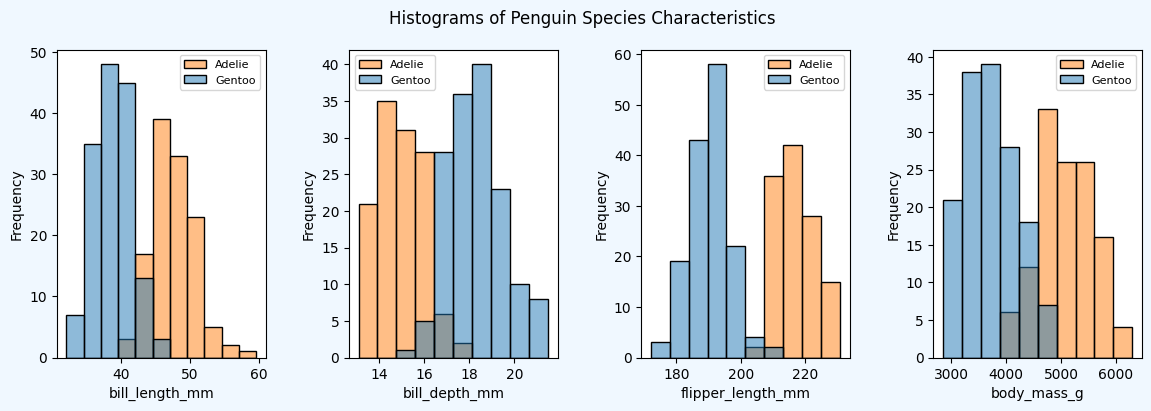

In [59]:
# Plotting histograms
features = df.columns[2:6]

fig = plt.figure(figsize = (14,4), facecolor = 'aliceblue')
plt.subplots_adjust(wspace = 0.4)
plt.suptitle('Histograms of Penguin Species Characteristics')
for i in range(len(features)):
    plt.subplot(1,4,i+1)
    sns.histplot(data = df, x = features[i], hue = 'species')
    plt.ylabel('Frequency')
    plt.legend(df.species.unique(), fontsize = 8)
plt.show()

There is a clear distinction between the two penguin species; Adelie and Gent, based on their physical features. Gentoo penguins seem to have a shorter bill and flipper length of 36mm to 46mm and 175mm to 210mm respectively, compared to Adelie penguins which have a bill length of approximately 42mm to 58mm and a flipper length of 205mm to 230mm. Gentoo penguins also have a larger bill depth in general, between 15mm to 22mm whereas Adelie penguins have a bill depth of approximately 13mm to 18mm. In addition, Adelie penguins generally weigh more than Gentoo penguins.

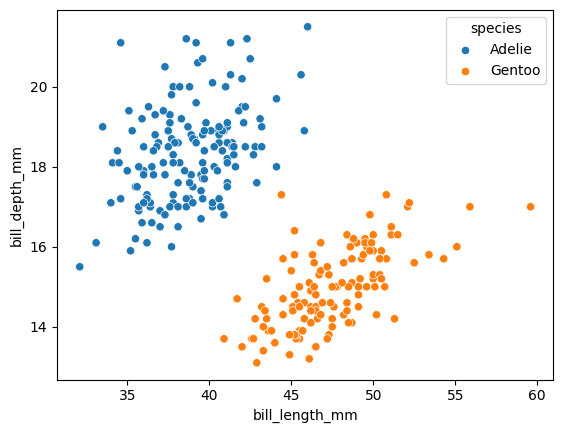

In [42]:
sns.scatterplot(data = df, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')
plt.show()

### Pearson Correlation

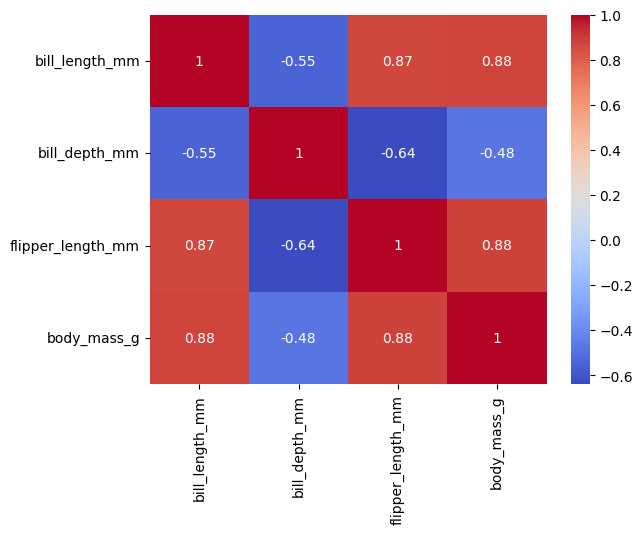

In [20]:
# Pearson correlation of features
X_features = df[features]
corr_matrix = X_features.corr(method = 'pearson')

# Plotting correlation heatmap 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

The heatmap above shows the correlation between the penguins' physical features. Flipper length and bill length have a high positive correlation with each other (0.87) however, bill depth is negatively correlated to flipper length and body mass. Body mass has a high positive correlation with bill length and flipper length. 

## Feature Importances

Next, we will determine the significance of the features using the magnitude of its coefficient and odd ratios. A positive coefficient indicates that the feature increases the log odds of the outcome and vise versa for a negative coefficient. For odd ratios, the table below shows the results of different values.

||More than 1| Equals 1 | Less than 1|
|-|-|-|-|
|**Odds Ratios Result**| Increases odds of outcome | Does not affect outcome | Decreases odd of outcome |

In [33]:
# Feature and target columns
X = df.drop(columns = 'species')
y = df.species

# Numerical and categorical columns
num_cols = X.select_dtypes(include = ['int', 'float']).columns
cat_cols = X.select_dtypes(include = 'object').columns

preprocessing = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse = False, drop = 'first'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])

In [22]:
# Apply the transformations to the training data
X_preprocessed = preprocessing.fit_transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns = preprocessing.get_feature_names_out())

# Split the data into train and test sets
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [34]:
# Initialising logistic regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_processed, y_train_processed)

LogisticRegression(random_state=0)

In [25]:
# Coefficients and Odds Ratios
coefficients = classifier.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance 
feature_importance = pd.DataFrame({
    'Feature': X_preprocessed.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
    })

print("Feature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Feature Importance (Coefficient and Odds Ratio):
                  Feature  Coefficient  Odds Ratio
4  num__flipper_length_mm     1.491026    4.441651
2     num__bill_length_mm     1.178041    3.248005
5        num__body_mass_g     1.170404    3.223295
6               num__year    -0.240905    0.785916
0       cat__island_Dream    -0.420247    0.656884
1   cat__island_Torgersen    -0.488981    0.613251
3      num__bill_depth_mm    -2.059607    0.127504


The penguins' flipper length seems to have the largest effect on the results with a coefficient of 1.5 and an odds ratio of 4.44, followed by its bill length and body mass. The bill depth negatively impacts the outcome of the results since it has the largest negative coefficient and the lowest odds ratio, -2.06 and 0.13 respectively. 

## Model Evaluation 

In [28]:
# Predicting y value from x_test
y_pred = classifier.predict(x_test_processed)

#Classifier metric score
accuracy = accuracy_score(y_test_processed, y_pred)
train_score = classifier.score(x_train_processed, y_train_processed)
test_score = classifier.score(x_test_processed, y_test_processed)
print(f"Model Accuracy: {accuracy:.2f}")
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Model Accuracy: 1.00
Train Score: 1.0
Test Score: 1.0


## Conclusion

The objective of this project was create a logistic regression model that can accurately predict the species of the penguins. From our model evaluation, we successfuly managed to do so based on the model's accuracy score, training score and testing score. This means that our model can predict with a 100% accuracy on seen and unseen data. This dataset was relatively easy to fit our model since it only has 5 feature columns and was cleaned and processed prior before. 